# 1. Fourier transform

### 1.1 Generate a discrete signal that has 64 samples

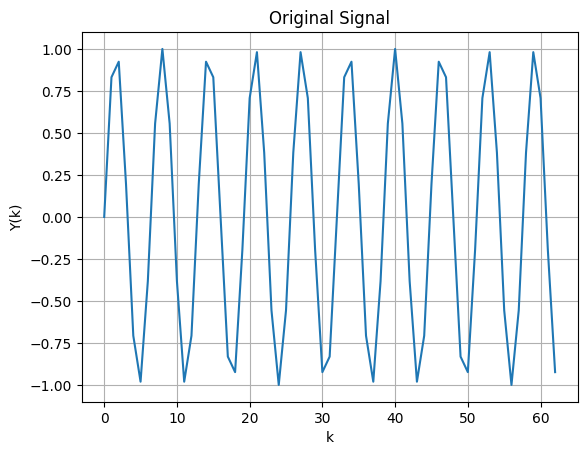

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 64
T = 1/128
k = np.arange(0, n-1)
f = np.sin(2*np.pi*20*k*T)
plt.plot(k, f)
plt.grid(True)
plt.title('Original Signal')
plt.xlabel('k')
plt.ylabel('Y(k)')
plt.show()

### 1.2

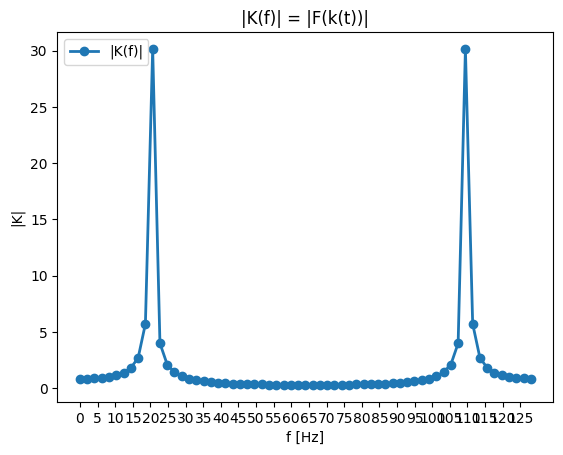

In [2]:
def plotFrequencyGraph(sampling_frequencies):
    T = 1 / sampling_frequencies
    f = np.sin(2 * np.pi * 20 * k * T)
    F = np.fft.fft(f)
    frequencies = np.linspace(0, sampling_frequencies, len(F))
    x_axis = np.arange(0, sampling_frequencies, step=5)
    plt.plot(frequencies, np.abs(F), label="|K(f)|", lw=2, marker='o')
    plt.xlabel("f [Hz]")
    plt.ylabel("|K|")
    plt.title(r"|K(f)| = |F(k(t))|")
    plt.xticks(x_axis)
    plt.legend()
    plt.show()

plotFrequencyGraph(128)

### 1.2

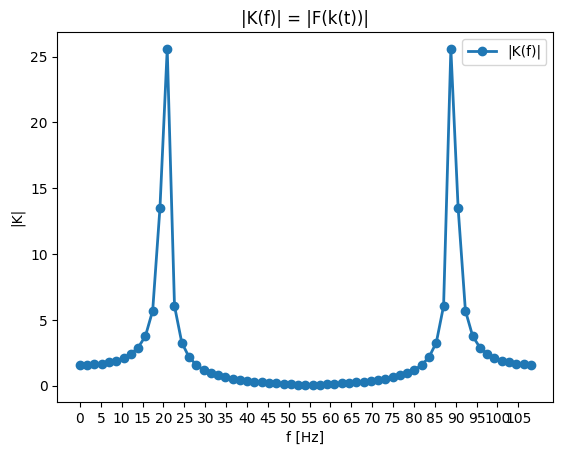

In [3]:
plotFrequencyGraph(108)

### 1.2 Continue

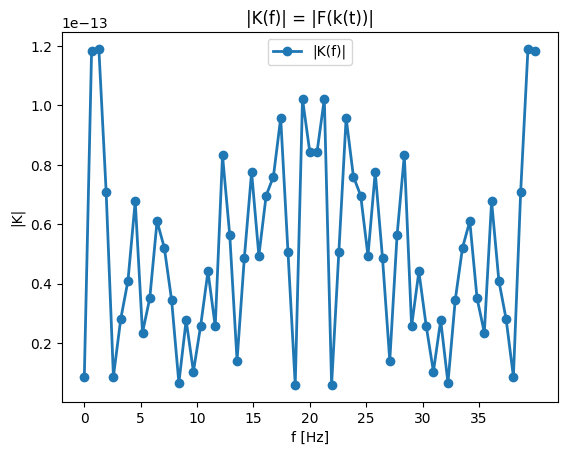

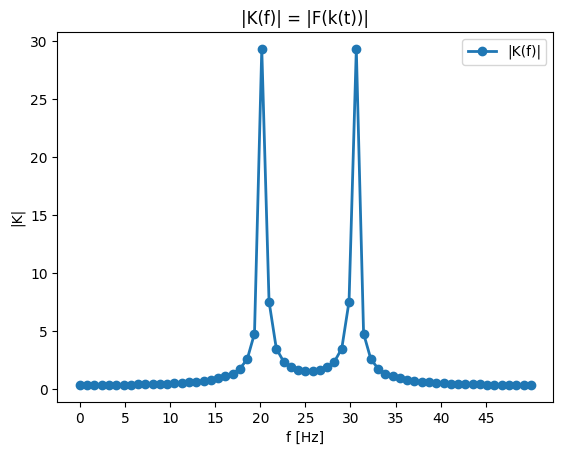

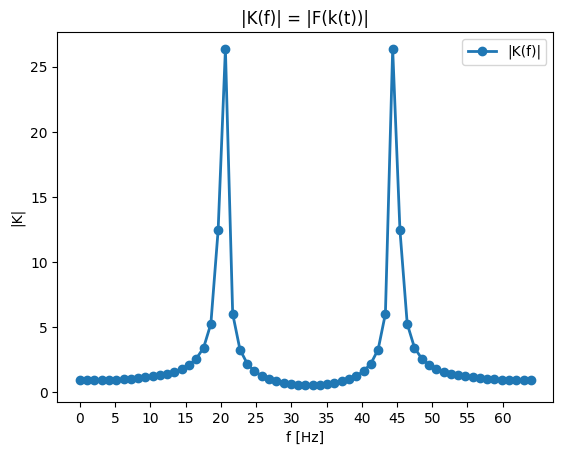

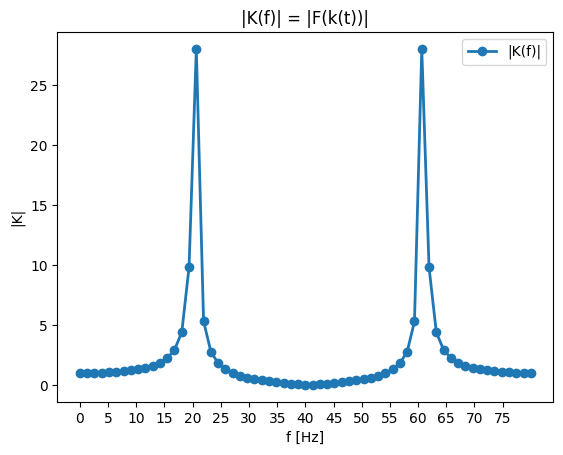

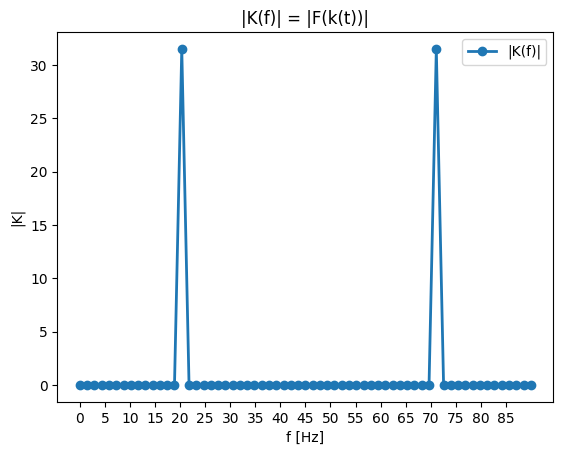

In [4]:
plots = [plotFrequencyGraph(40),plotFrequencyGraph(50),plotFrequencyGraph(64),plotFrequencyGraph(80),plotFrequencyGraph(90)]

### 1.3

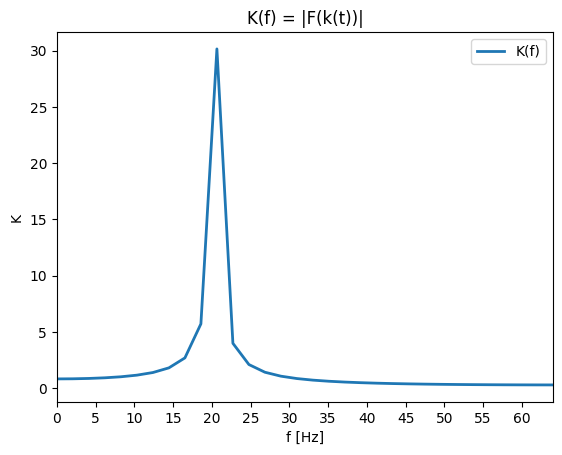

In [5]:
max_frequency = 1/T
f = np.sin(2 * np.pi * 20 * k * T)
F = np.fft.fft(f)
frequencies = np.linspace(0, max_frequency, len(F))
x_axis = np.arange(0, max_frequency, step=5)
plt.plot(frequencies, np.abs(F), label="K(f)", lw=2)
plt.xlabel("f [Hz]")
plt.ylabel("K")
plt.title(r"K(f) = |F(k(t))|")
plt.xticks(x_axis)
plt.xlim(0, max_frequency / 2)
plt.legend()
plt.show()


### 1.4

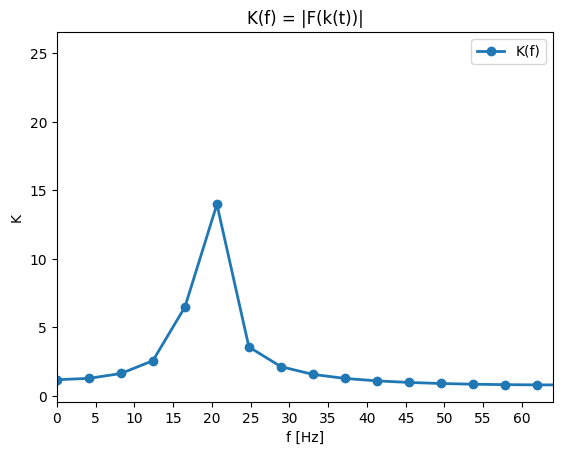

In [6]:
T = 1/128
max_frequency = 1 / T
f = np.sin(2 * np.pi * 19 * k * T)
F = np.fft.fft(f)
frequencies = np.linspace(0, max_frequency, len(F))
x_axis = np.arange(0, max_frequency, step=5)

plt.plot(frequencies[::2], np.abs(F[::2]), label="K(f)", lw=2, linestyle='-', marker='o')
plt.xlabel("f [Hz]")
plt.ylabel("K")
plt.title(r"K(f) = |F(k(t))|")
plt.xticks(x_axis)
plt.xlim(0, max_frequency / 2)
plt.legend()
plt.show()

# 2

### 2.1

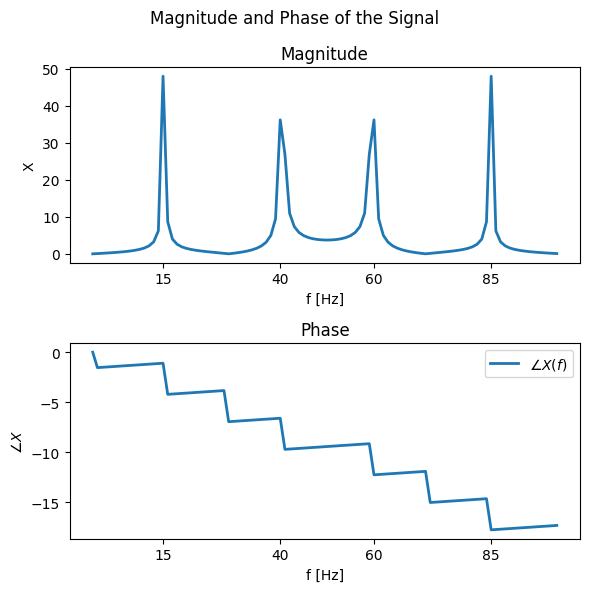

In [7]:

# Define time and signal
t = np.linspace(0, 1, 100)  # 100 points from 0 to 1
x = np.sin(2*np.pi * 15 * t) + np.sin(2*np.pi * 40 * t)

# Perform FFT
X = np.fft.fft(x)
magnitude = np.abs(X)
phases = np.unwrap(np.angle(X), period=2*np.pi)
frequencies = np.arange(len(X))  # Frequencies for each FFT coefficient

# Desired x-axis points
x_axis = [15, 40, 60, 85]

# Create magnitude plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))  # 2 subplots, figsize for dimensions

ax1.plot(frequencies, magnitude, label="|X(f)|", linewidth=2)
ax1.set_xlabel("f [Hz]")
ax1.set_ylabel("X")
ax1.set_title("Magnitude")
ax1.set_xticks(x_axis)  # Set desired x-axis ticks

# Create phase plot
ax2.plot(frequencies, phases, label=r"$\angle{X(f)}$", linewidth=2)
ax2.set_xlabel("f [Hz]")
ax2.set_ylabel(r"$\angle{X}$")
ax2.set_title("Phase")
ax2.set_xticks(x_axis)

# Combine plots and show
fig.suptitle('Magnitude and Phase of the Signal')  # Overall title
plt.legend()
plt.tight_layout()
plt.show()

### 2.1 cont

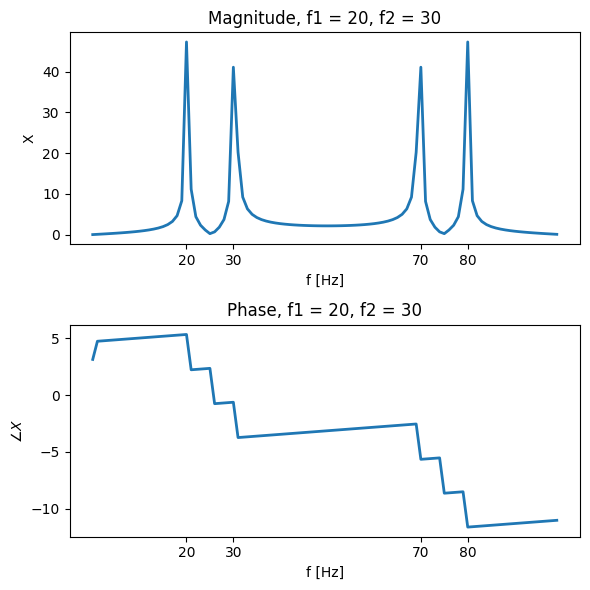

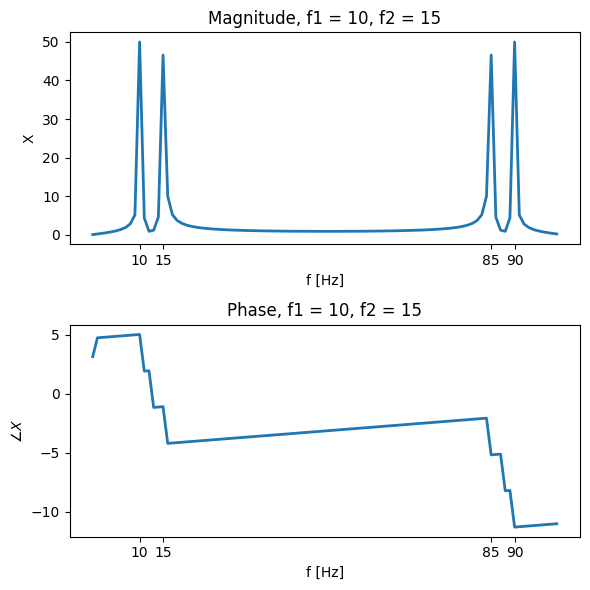

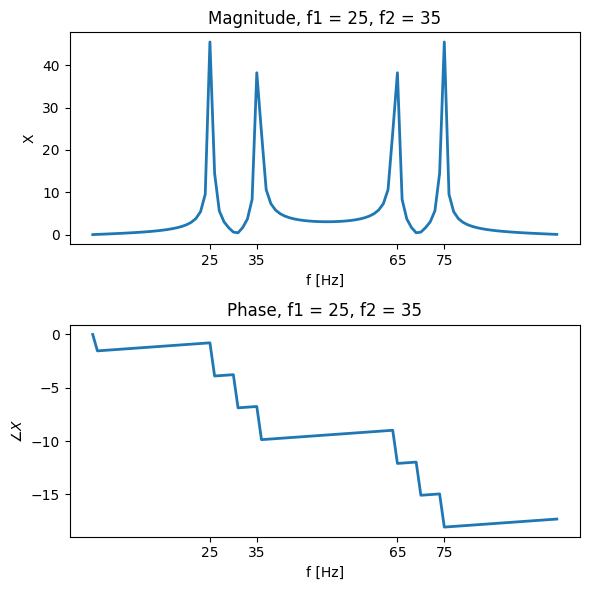

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def graph_frequency_pairs(frequency_pairs):
    t = np.linspace(0, 1, 100)
    plots = []
    for pair in frequency_pairs:
        x = np.sin(2 * np.pi * pair[0] * t) + np.sin(2 * np.pi * pair[1] * t)
        X = np.fft.fft(x)
        magnitude = np.abs(X)
        phases = np.unwrap(np.angle(X), period=2 * np.pi)
        frequencies = np.arange(len(X))

        x_axis = [pair[0], pair[1], 100 - pair[1], 100 - pair[0]]

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
        ax1.plot(frequencies, magnitude, label="|X(f)|", linewidth=2)
        ax1.set_xlabel("f [Hz]")
        ax1.set_ylabel("X")
        ax1.set_title(f"Magnitude, f1 = {pair[0]}, f2 = {pair[1]}")
        ax1.set_xticks(x_axis)

        ax2.plot(frequencies, phases, label=r"$\angle{X(f)}$", linewidth=2)
        ax2.set_xlabel("f [Hz]")
        ax2.set_ylabel(r"$\angle{X}$")
        ax2.set_title(f"Phase, f1 = {pair[0]}, f2 = {pair[1]}")
        ax2.set_xticks(x_axis)

        fig.tight_layout()
        plots.append(fig)
    return plots

frequency_pairs = [(20, 30), (10, 15), (25, 35)]
plots = graph_frequency_pairs(frequency_pairs)
plt.show()


# 3

### 3.1

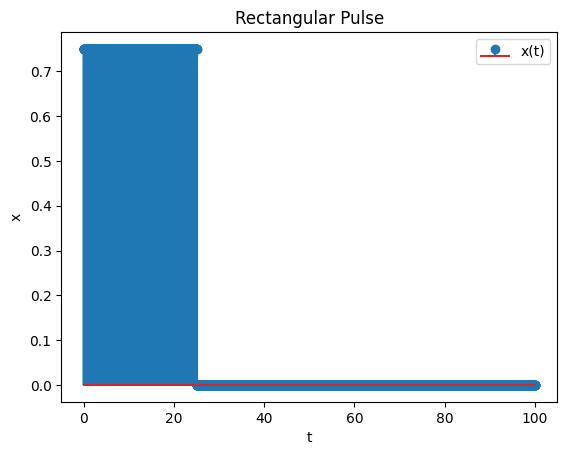

In [20]:
def rectpuls(t, w=1.0):
    return np.where(np.abs(t) <= w / 2, 1.0, 0.0)

def plotSignal(w):
    amplitude = 0.75
    interval = 0.01
    T = 100
    t = np.arange(0, T + interval, interval)
    x = amplitude * rectpuls(t, w)

    plt.stem(t, x, label="x(t)")
    plt.xlabel("t")
    plt.ylabel("x")
    plt.title("Rectangular Pulse")
    plt.legend()
    plt.show()

plotSignal(50)

### 3.2

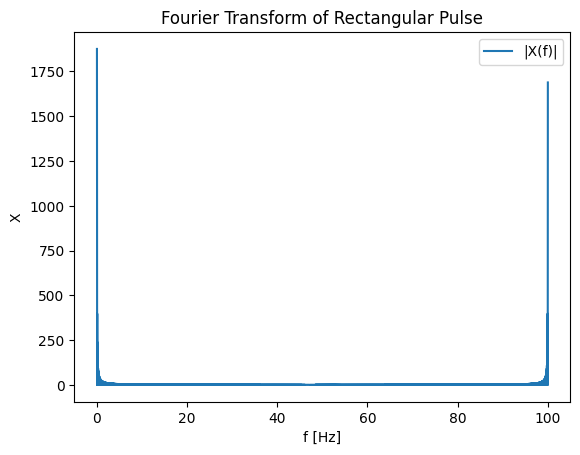

In [27]:
def plotDependency(w):
    T = 100
    amplitude = 0.75
    interval = 0.01
    t = np.arange(0, T + interval, interval)
    x = amplitude * rectpuls(t, w)
    df = 1 / T
    Fmax = 1 / interval
    frequencies = np.arange(0, Fmax + df, df)

    y = np.fft.fft(x)
    plt.plot(frequencies, np.abs(y), label="|X(f)|")
    plt.xlabel("f [Hz]")
    plt.ylabel("X")
    plt.title("Fourier Transform of Rectangular Pulse")
    plt.legend()
    plt.show()

plotDependency(50)


### 3.2 cont

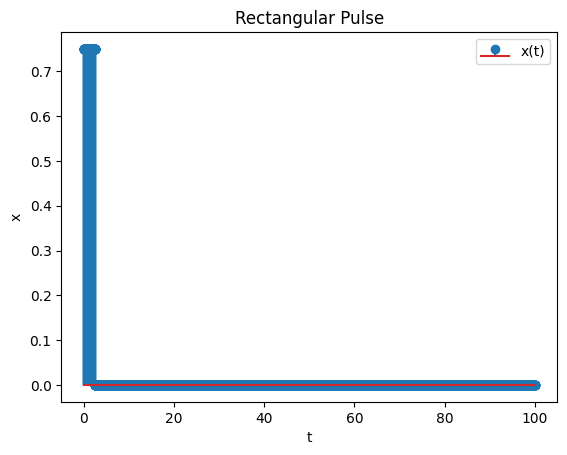

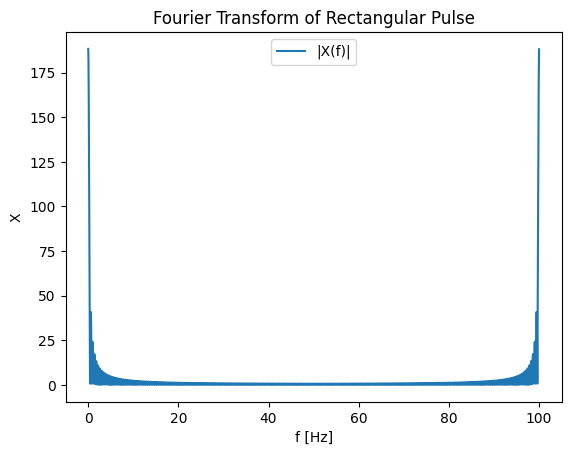

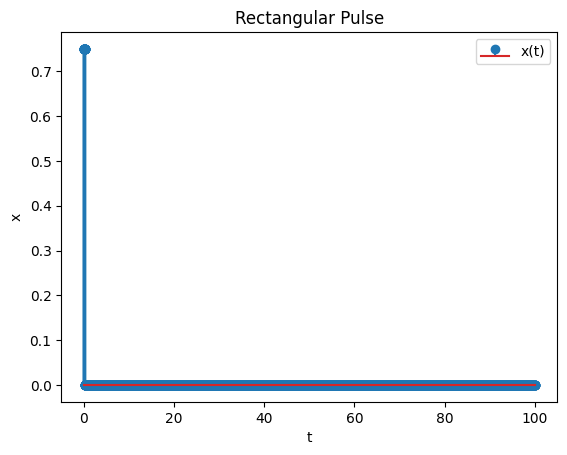

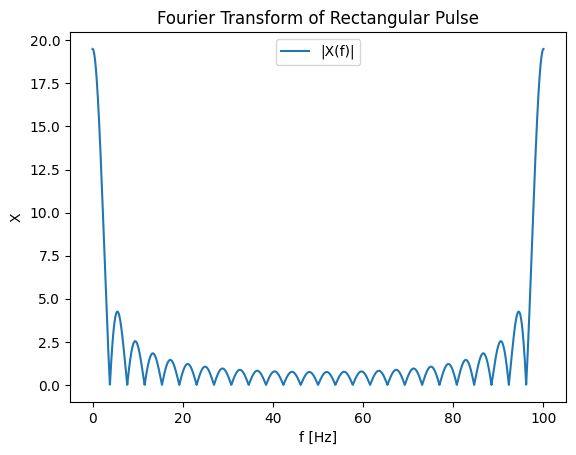

In [30]:
plotSignal(5)
plotDependency(5)
plotSignal(0.5)
plotDependency(0.5)

### 3.3

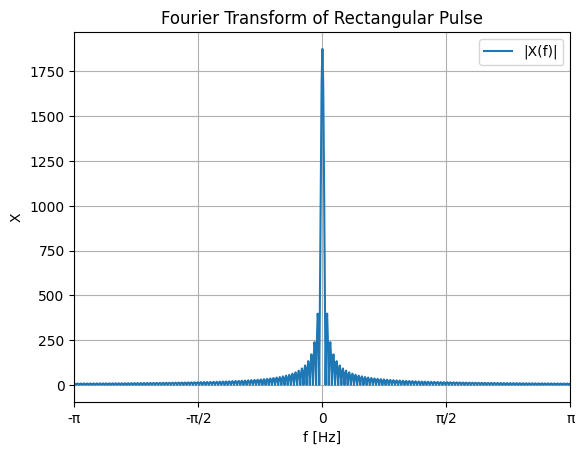

In [44]:
def fourier_transform_plot(y, Fmax, df, title="Fourier Transform of Rectangular Pulse"):
    yp = np.fft.fftshift(y)
    f1 = np.arange(-Fmax / 2, Fmax / 2 + df, df)
    abs_yp = np.abs(yp)

    plt.plot(f1, abs_yp, label="|X(f)|")
    plt.xlabel("f [Hz]")
    plt.ylabel("X")
    plt.title(title)
    plt.xlim(-np.pi, np.pi)
    plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi], ["-π", "-π/2", "0", "π/2", "π"])
    plt.legend()
    plt.grid(True)
    plt.show()

def fast_fourier_transform():
    amplitude = 0.75
    interval = 0.01
    T = 100
    t = np.arange(0, T + interval, interval)
    x = amplitude * rectpuls(t, 50)
    y = np.fft.fft(x)
    Fmax = 1 / interval
    df = 1 / T

    return y, Fmax, df

fourier_transform_plot(*fast_fourier_transform())


### 3.4

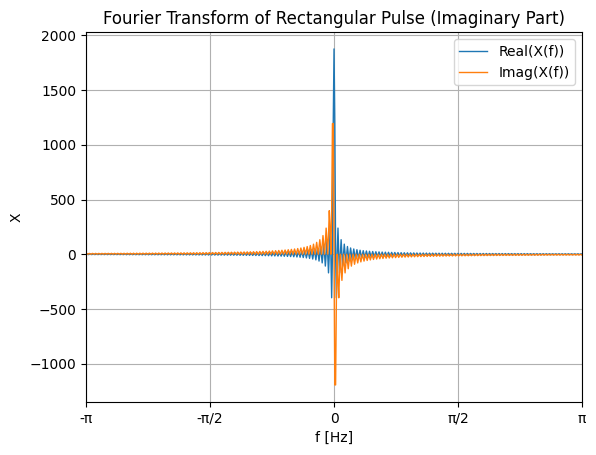

In [46]:
[y, Fmax, df] = fast_fourier_transform()

yp = np.fft.fftshift(y)
f1 = np.arange(-Fmax / 2, Fmax / 2 + df, df)

plt.plot(f1, np.real(yp), label="Real(X(f))", lw=1)
plt.xlabel("f [Hz]")
plt.ylabel("X")
plt.title("Fourier Transform of Rectangular Pulse (Real Part)")
plt.xlim(-np.pi, np.pi)
plt.xticks([-np.pi, -np.pi / 2, 0, np.pi / 2, np.pi], ["-π", "-π/2", "0", "π/2", "π"])
plt.grid(True)

plt.plot(f1, np.imag(yp), label="Imag(X(f))", lw=1)
plt.title("Fourier Transform of Rectangular Pulse (Imaginary Part)")
plt.legend()
plt.grid(True)
plt.show()

# 4

### 4.1

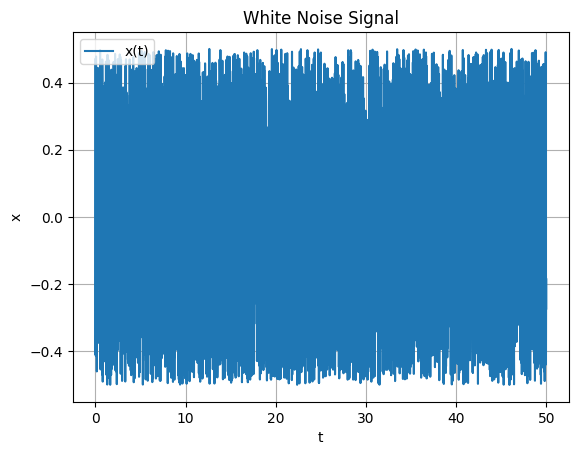

In [66]:
interval = 0.01
T = 50
t = np.arange(0, T + interval, interval)
x1 = np.random.rand(len(t)) - 0.5

# Plot the white noise
plt.plot(t, x1, label="x(t)")
plt.title("White Noise Signal")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid(True)
plt.show()

### 4.2

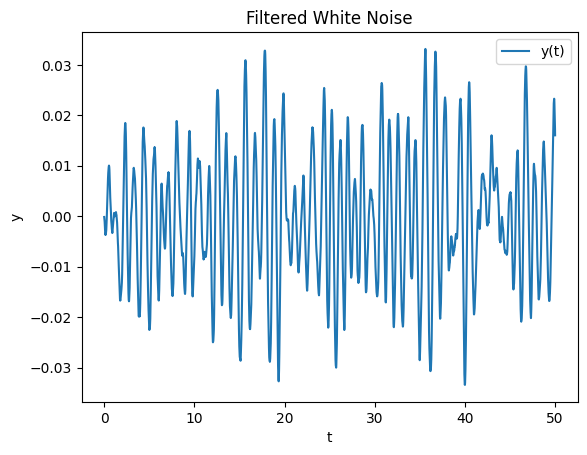

In [69]:
from scipy.signal import lfilter

om0 = 2 * np.pi
dz = 0.05
A = 1
oms = om0 * interval

a = [1 + 2 * dz * oms + oms**2, -2 * (1 + dz * oms), 1]
b = [A * 2 * dz * oms**2]

y = lfilter(b, a, x1)

plt.plot(t, y, label="y(t)")
plt.xlabel("t")
plt.ylabel("y")
plt.title("Filtered White Noise")
plt.legend()
plt.show()

### 4.3

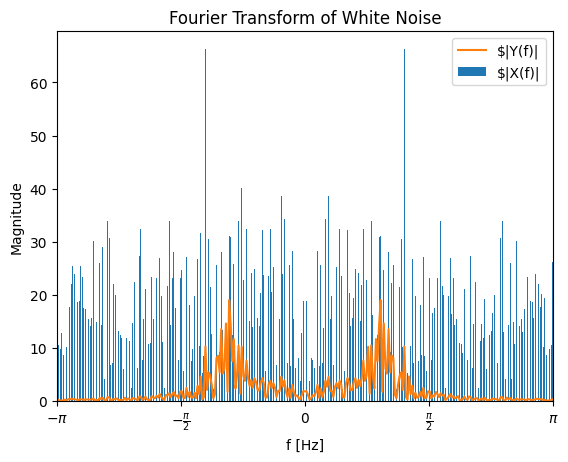

In [103]:
df = 1 / T
Fmax = 1 / interval

frequencies = np.arange(-Fmax / 2, Fmax / 2 + df, df)

F_x1 = np.fft.fft(x1)
F_y = np.fft.fft(y)

F_x1_shifted = np.fft.fftshift(F_x1)
F_y_shifted = np.fft.fftshift(F_y)

mag_X1 = np.abs(F_x1_shifted)
mag_Y = np.abs(F_y_shifted)

xticks_locs = np.arange(-np.pi, np.pi + np.pi/2, np.pi/2)
xticks_labels = [r'$-\pi$', r'$-\frac{\pi}{2}$', '0', r'$\frac{\pi}{2}$', r'$\pi$']

plt.bar(frequencies, mag_X1, label="$|X(f)|", width=0.01)
plt.plot(frequencies, mag_Y, label="$|Y(f)|", color="C1")
plt.xlabel("f [Hz]")
plt.ylabel("Magnitude")
plt.title("Fourier Transform of White Noise")
plt.xticks(xticks_locs, xticks_labels)
plt.xlim(-np.pi, np.pi)
plt.legend()

plt.show()
